In [72]:
from brian2 import *

start_scope()
prefs.codegen.target = 'numpy'

In [85]:
C_m = 1*ufarad/cm**2
g_Na = 120*msiemens/cm**2
g_K = 36*msiemens/cm**2
g_L = 0.3*msiemens/cm**2
E_Na = 50*mV
E_K = -77*mV
E_L = -54.4*mV
I_ext = 10*uA/cm**2

eqs_HH = '''
            dv/dt = (I_ext - g_Na*m**3*h*(v-E_Na) - g_K*n**4*(v-E_K) + g_L*(v-E_L))/C_m : volt
            dm/dt = alpha_m*(1-m) - beta_m*m : 1
            dn/dt = alpha_n*(1-n) - beta_n*n : 1
            dh/dt = alpha_h*(1-h) - beta_h*h : 1

            alpha_m = 0.1/mV*(25*mV - v)/(exp((25*mV - v)/(10*mV))-1)/ms : Hz
            beta_m = 4*(exp(-v/(18*mV)))/ms : Hz
            
            alpha_h = 0.07*(exp(-v/(20*mV)))/ms : Hz
            beta_h = 1/(exp((30*mV - v)/(10*mV)) + 1)/ms : Hz

            alpha_n = 0.01/mV*(10*mV - v)/(exp((10*mV - v)/(10*mV))  -1)/ms : Hz
            beta_n = 0.125*(exp(-v/(80*mV)))/ms : Hz
        '''

defaultclock.dt = 0.01*ms
G = NeuronGroup(1, model = eqs_HH, method = 'exponential_euler')
G.v = -65*mV
G.m = 0.05
G.h = 0.6
G.n = 0.32

M = StateMonitor(G, 'v', record = True)
run(50*ms)

Text(0.5, 1.0, 'Hodgkin_Huxley Implementation')

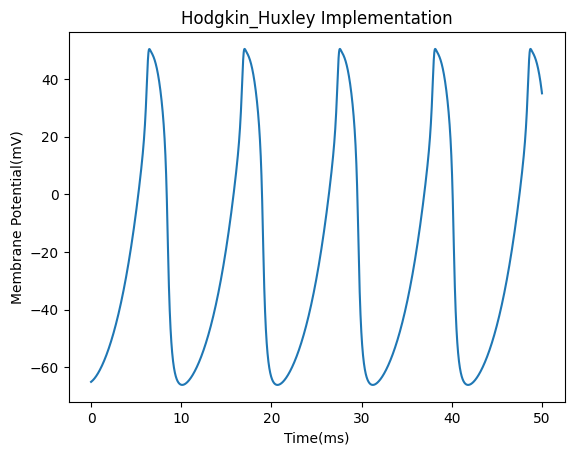

In [86]:
plot(M.t/ms, M.v[0]/mV)
xlabel('Time(ms)')
ylabel('Membrane Potential(mV)')
title('Hodgkin_Huxley Implementation')